In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus 

In [60]:
mushroom_df = pd.read_csv("mushrooms.csv")

In [61]:
def get_features(data):
    features = [f for f in data]
    return features

In [62]:
def make_categories(data):
    data = data.copy()
    features = get_features(data)
    for feature in features:
        data[feature] = data[feature].astype("category")
        data[feature] = data[feature].cat.codes
    return data

In [63]:
mushroom = make_categories(mushroom_df)

In [64]:
features = get_features(mushroom)
empty_dict = {}
for feature in features:
    empty_dict[feature] = mushroom[feature].nunique()
print(empty_dict)

{'class': 2, 'cap-shape': 6, 'cap-surface': 4, 'cap-color': 10, 'bruises': 2, 'odor': 9, 'gill-attachment': 2, 'gill-spacing': 2, 'gill-size': 2, 'gill-color': 12, 'stalk-shape': 2, 'stalk-root': 5, 'stalk-surface-above-ring': 4, 'stalk-surface-below-ring': 4, 'stalk-color-above-ring': 9, 'stalk-color-below-ring': 9, 'veil-type': 1, 'veil-color': 4, 'ring-number': 3, 'ring-type': 5, 'spore-print-color': 9, 'population': 6, 'habitat': 7}


In [65]:
mushroom.drop("veil-type", axis=1, inplace=True)

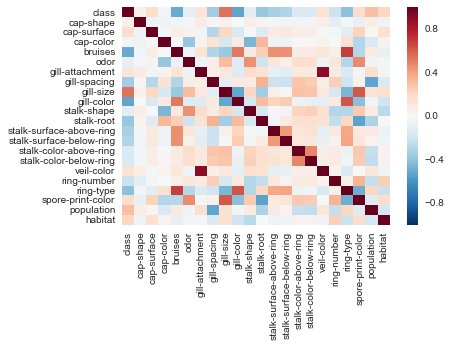

In [66]:
sns.heatmap(mushroom.corr())

In [67]:
mushroom_corr = mushroom.corr()

In [68]:
print(mushroom_corr.sort_values(["class"], ascending=False))

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
population                0.298686   0.063413     0.021555  -0.144770   
habitat                   0.217179  -0.042221     0.163887   0.033925   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
spore-print-color         0.171961  -0.073416     0.230364  -0.293523   
veil-color                0.145142   0.072560    -0.016603   0.036130   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-color-below-ring   -0.146730  -0.030390     0

In [69]:
X = mushroom.drop("class", axis=1)
y = mushroom["class"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Random Forest

In [71]:
forest = RandomForestClassifier()
forest_params = {"n_estimators": [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000], 
                "criterion": ["gini", "entropy"],
                "max_features": ["auto", "log2"]}
forest_grid = GridSearchCV(forest, forest_params, cv=10)
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
forest_grid.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 3}

In [73]:
forest_grid.best_score_

1.0

In [74]:
y_pred = forest_grid.predict(X_test)

In [75]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438



In [76]:
print(confusion_matrix(y_pred, y_test))

[[1274    0]
 [   0 1164]]


## Logistic Regression

In [77]:
logistic = LogisticRegression()
logistic_params = {"penalty": ["l1", "l2"], 
                "C": [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]}
logistic_grid = GridSearchCV(logistic, logistic_params, cv=10)
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
logistic_grid.best_params_

{'C': 300, 'penalty': 'l2'}

In [79]:
logistic_grid.best_score_

0.9730918044319381

In [80]:
logistic2 = LogisticRegression(penalty="l1", C=11)
logistic2.fit(X_train, y_train)
y_pred = logistic2.predict(X_test)
X_features = get_features(X)
coefficients = logistic2.coef_.transpose()
coeff_df = pd.DataFrame(coefficients, index=X_features, columns= ["importance"])
coeff_df.sort_values("importance")

,importance
gill-attachment,-27.747257
gill-spacing,-22.772832
stalk-surface-above-ring,-12.608141
stalk-root,-9.062299
stalk-shape,-2.694125
population,-1.231896
odor,-1.195256
stalk-color-above-ring,-0.229229
gill-color,-0.193717
spore-print-color,-0.175610


In [81]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1273
          1       0.97      0.97      0.97      1165

avg / total       0.97      0.97      0.97      2438



## Logistic Regression with SelectKBest Pipeline

In [82]:
five_best = SelectKBest(k=5)
top_five_log = Pipeline(steps=[("five_best", five_best), ("logistic2", logistic2)])

In [83]:
top_five_log.fit(X_train, y_train)

Pipeline(steps=[('five_best', SelectKBest(k=5, score_func=<function f_classif at 0x1199ae6a8>)), ('logistic2', LogisticRegression(C=11, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [84]:
y_pred2 = top_five_log.predict(X_test)

In [85]:
y_pred2

array([1, 0, 0, ..., 1, 1, 1], dtype=int8)

In [86]:
print(classification_report(y_pred2, y_test))

             precision    recall  f1-score   support

          0       0.86      0.78      0.82      1408
          1       0.73      0.83      0.78      1030

avg / total       0.81      0.80      0.80      2438



In [87]:
print(confusion_matrix(y_pred2, y_test))

[[1095  313]
 [ 179  851]]


## Create decision tree for poisonous mushrooms

In [88]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [89]:
y_tree_pred = d_tree.predict(X_test)

In [90]:
print(classification_report(y_tree_pred, y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438



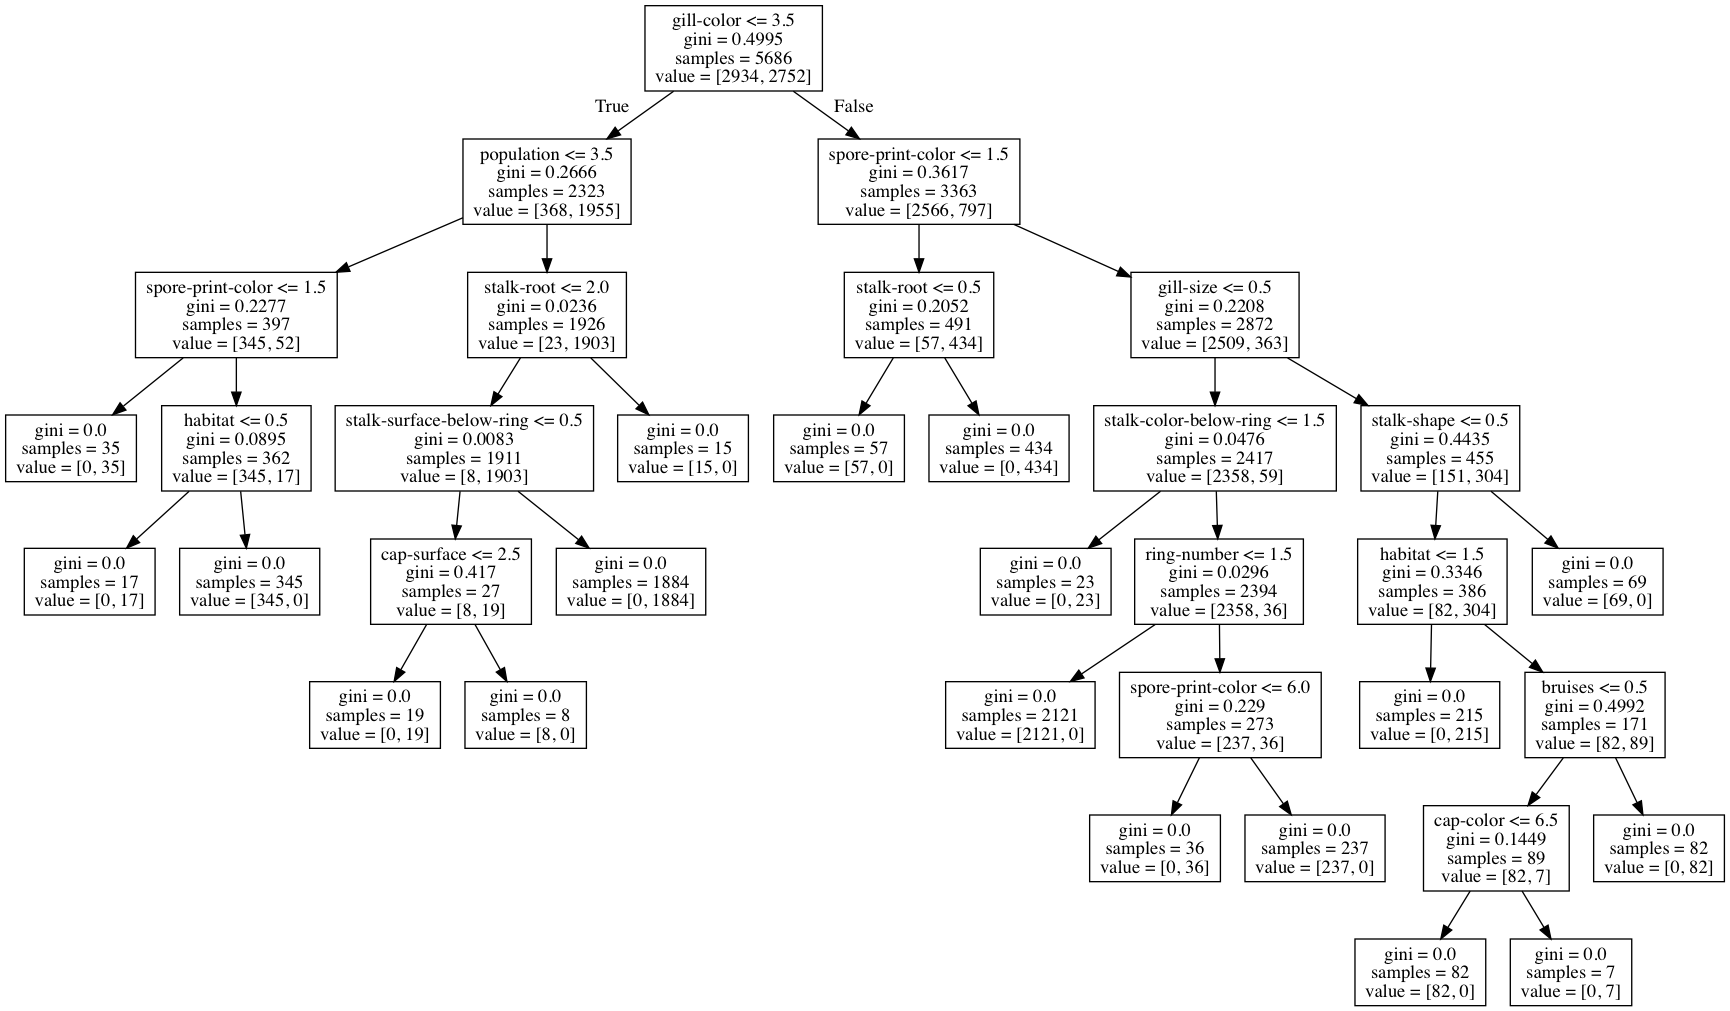

In [91]:
dot_data = StringIO()  
dot_data = tree.export_graphviz(d_tree, out_file=None,feature_names=X_features) 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

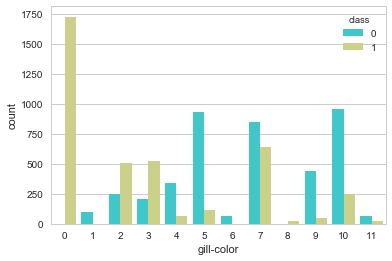

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='gill-color',hue='class',data=mushroom,palette='rainbow')

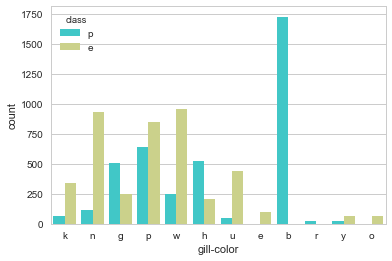

In [93]:
sns.set_style('whitegrid')
sns.countplot(x='gill-color',hue='class',data=mushroom_df,palette='rainbow')